In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [68]:
all_data_df = pd.read_csv('policy_databox/full_data.csv')


In [69]:
US_POPULATION = 346000000
us_data_df = all_data_df[all_data_df["location"] == "United States"]
us_data_df.reset_index(drop=True, inplace=True)
us_data_df["date"] = pd.to_datetime(us_data_df["date"])
us_data_df["new_deaths_per_100k"] = us_data_df["new_deaths"] / US_POPULATION * 100000
us_data_df["new_cases_per_100k"] = us_data_df["new_cases"] / US_POPULATION * 100000
us_data_df.head()

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2671037584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_df["date"] = pd.to_datetime(us_data_df["date"])
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2671037584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_df["new_deaths_per_100k"] = us_data_df["new_deaths"] / US_POPULATION * 100000
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2671037584.py:6: SettingWithCopyWarning: 
A value is

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,new_deaths_per_100k,new_cases_per_100k
0,2020-01-05,United States,0.0,0.0,0,0,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-01-06,United States,0.0,0.0,0,0,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-01-07,United States,0.0,0.0,0,0,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-01-08,United States,0.0,0.0,0,0,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-01-09,United States,0.0,0.0,0,0,NaN,NaN,NaN,NaN,0.0,0.0


In [70]:
CANADA_POPULATION = 41000000
canada_data_df = all_data_df[all_data_df["location"] == "Canada"]
canada_data_df.reset_index(drop=True, inplace=True)
canada_data_df["date"] = pd.to_datetime(us_data_df["date"])
canada_data_df["new_deaths_per_100k"] = canada_data_df["new_deaths"] / CANADA_POPULATION * 100000
canada_data_df["new_cases_per_100k"] = canada_data_df["new_cases"] / CANADA_POPULATION * 100000
canada_data_df.head()
canada_data_df["date"][0]

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2219574928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_data_df["date"] = pd.to_datetime(us_data_df["date"])
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2219574928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_data_df["new_deaths_per_100k"] = canada_data_df["new_deaths"] / CANADA_POPULATION * 100000
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2219574928.py:6: SettingWithCopyWarn

Timestamp('2020-01-05 00:00:00')

In [71]:
canada_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_CAN_v1.csv")
canada_policy_df = canada_policy_df[canada_policy_df["Jurisdiction"] == "NAT_TOTAL"]
canada_policy_df["date"] = pd.to_datetime(canada_policy_df["Date"], format="%Y%m%d")
canada_policy_df.reset_index(drop=True, inplace=True)
canada_policy_df.head()

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/2329220289.py:1: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  canada_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_CAN_v1.csv")


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,date
0,Canada,CAN,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,NaN,NaN,...,3.12,3.12,3.12,3.12,3.57,3.57,3.57,3.57,0.0,2020-01-01
1,Canada,CAN,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,NaN,NaN,...,3.12,3.12,3.12,3.12,3.57,3.57,3.57,3.57,0.0,2020-01-02
2,Canada,CAN,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,NaN,NaN,...,3.12,3.12,3.12,3.12,3.57,3.57,3.57,3.57,0.0,2020-01-03
3,Canada,CAN,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,NaN,NaN,...,3.12,3.12,3.12,3.12,3.57,3.57,3.57,3.57,0.0,2020-01-04
4,Canada,CAN,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,NaN,NaN,...,3.12,3.12,3.12,3.12,3.57,3.57,3.57,3.57,0.0,2020-01-05


In [72]:
us_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_USA_v1.csv")
us_policy_df = us_policy_df[us_policy_df["Jurisdiction"] == "NAT_TOTAL"]
us_policy_df["date"] = pd.to_datetime(us_policy_df["Date"], format="%Y%m%d")
us_policy_df.reset_index(drop=True, inplace=True)
us_policy_df.head()

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_2238/237048786.py:1: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_USA_v1.csv")


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,date
0,United States,USA,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01
1,United States,USA,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02
2,United States,USA,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03
3,United States,USA,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04
4,United States,USA,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05


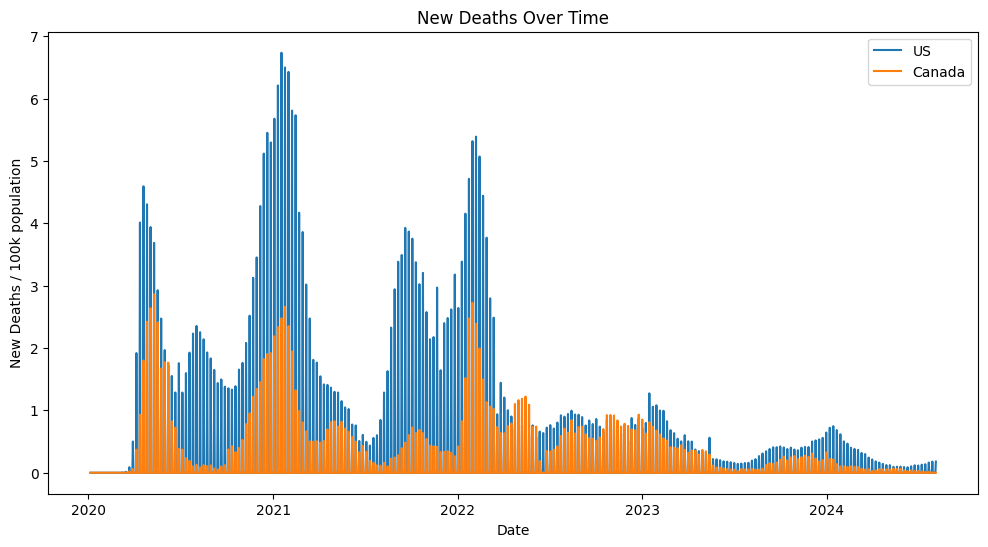

In [73]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(us_data_df["date"], us_data_df["new_deaths_per_100k"], label="US")
plt.plot(canada_data_df["date"], canada_data_df["new_deaths_per_100k"], label="Canada")

# Add title and labels
plt.title("New Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("New Deaths / 100k population")

# Display the plot
plt.legend()
plt.show()

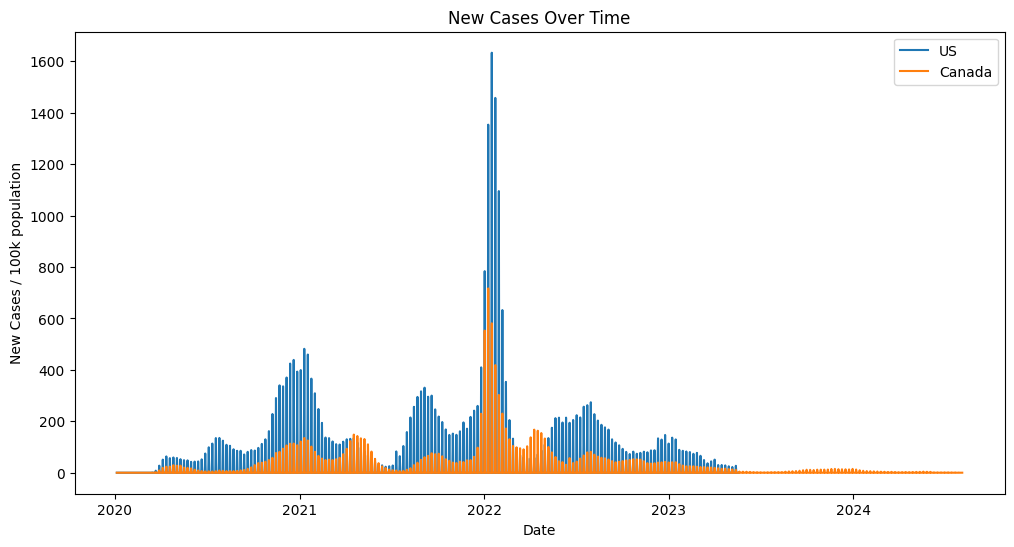

In [74]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(us_data_df["date"], us_data_df["new_cases_per_100k"], label="US")
plt.plot(canada_data_df["date"], canada_data_df["new_cases_per_100k"], label="Canada")

# Add title and labels
plt.title("New Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases / 100k population")

# Display the plot
plt.legend()
plt.show()

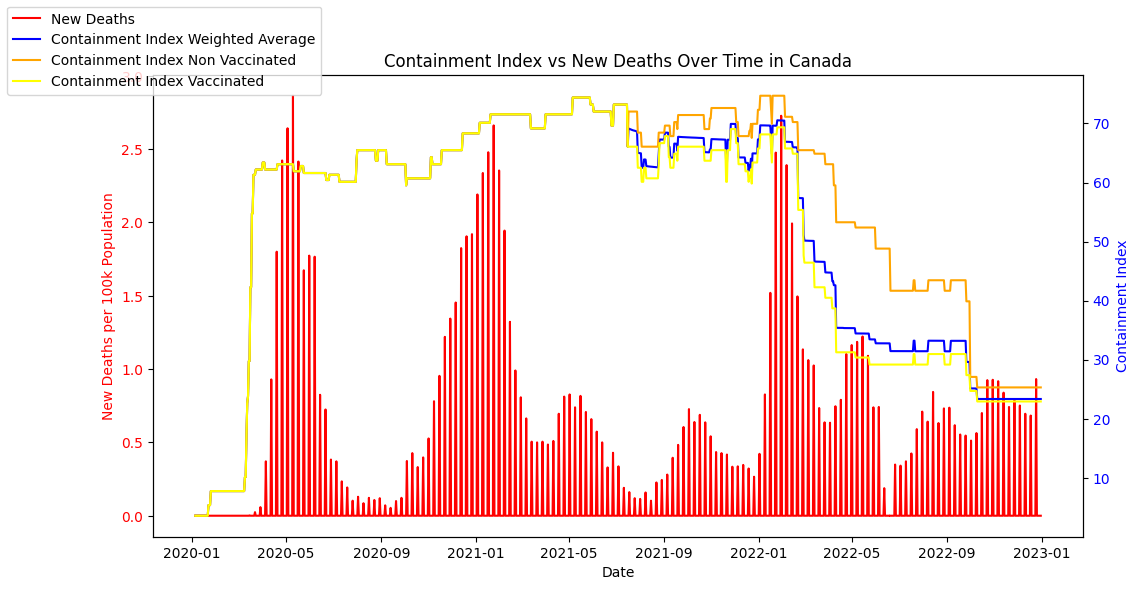

In [75]:
# Merge DataFrames on 'date'
canada_merged_df = pd.merge(canada_data_df, canada_policy_df, on="date")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new deaths
ax1.plot(canada_merged_df["date"], canada_merged_df["new_deaths_per_100k"], color="red", label="New Deaths")
ax1.set_xlabel("Date")
ax1.set_ylabel("New Deaths per 100k Population", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create a secondary y-axis for Stringency Index
ax2 = ax1.twinx()
ax2.plot(
    canada_merged_df["date"],
    canada_merged_df["ContainmentHealthIndex_WeightedAverage"],
    color="blue",
    label="Containment Index Weighted Average",
)
ax2.plot(
    canada_merged_df["date"],
    canada_merged_df["ContainmentHealthIndex_NonVaccinated"],
    color="orange",
    label="Containment Index Non Vaccinated",
)
ax2.plot(
    canada_merged_df["date"],
    canada_merged_df["ContainmentHealthIndex_Vaccinated"],
    color="yellow",
    label="Containment Index Vaccinated",
)
ax2.set_ylabel("Containment Index", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Add title and legend
plt.title("Containment Index vs New Deaths Over Time in Canada")
fig.legend(loc="upper left")

plt.show()

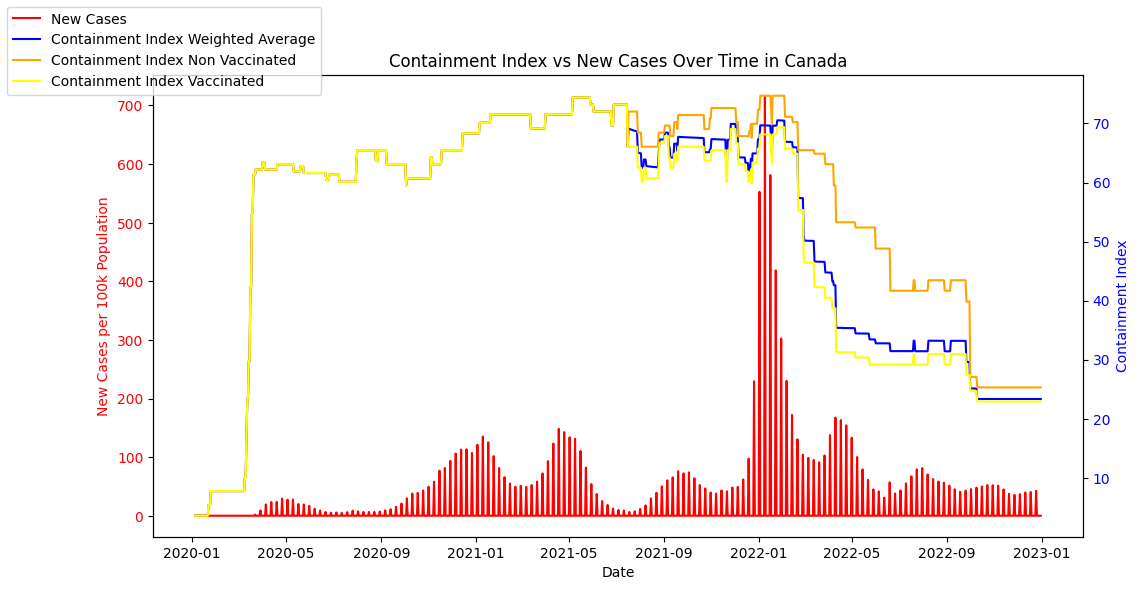

In [76]:
# Merge DataFrames on 'date'
canada_merged_df = pd.merge(canada_data_df, canada_policy_df, on="date")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new deaths
ax1.plot(canada_merged_df["date"], canada_merged_df["new_cases_per_100k"], color="red", label="New Cases")
ax1.set_xlabel("Date")
ax1.set_ylabel("New Cases per 100k Population", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create a secondary y-axis for Stringency Index
ax2 = ax1.twinx()
ax2.plot(
    canada_merged_df["date"],
    canada_merged_df["ContainmentHealthIndex_WeightedAverage"],
    color="blue",
    label="Containment Index Weighted Average",
)
ax2.plot(
    canada_merged_df["date"],
    canada_merged_df["ContainmentHealthIndex_NonVaccinated"],
    color="orange",
    label="Containment Index Non Vaccinated",
)
ax2.plot(
    canada_merged_df["date"],
    canada_merged_df["ContainmentHealthIndex_Vaccinated"],
    color="yellow",
    label="Containment Index Vaccinated",
)
ax2.set_ylabel("Containment Index", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Add title and legend
plt.title("Containment Index vs New Cases Over Time in Canada")
fig.legend(loc="upper left")

plt.show()

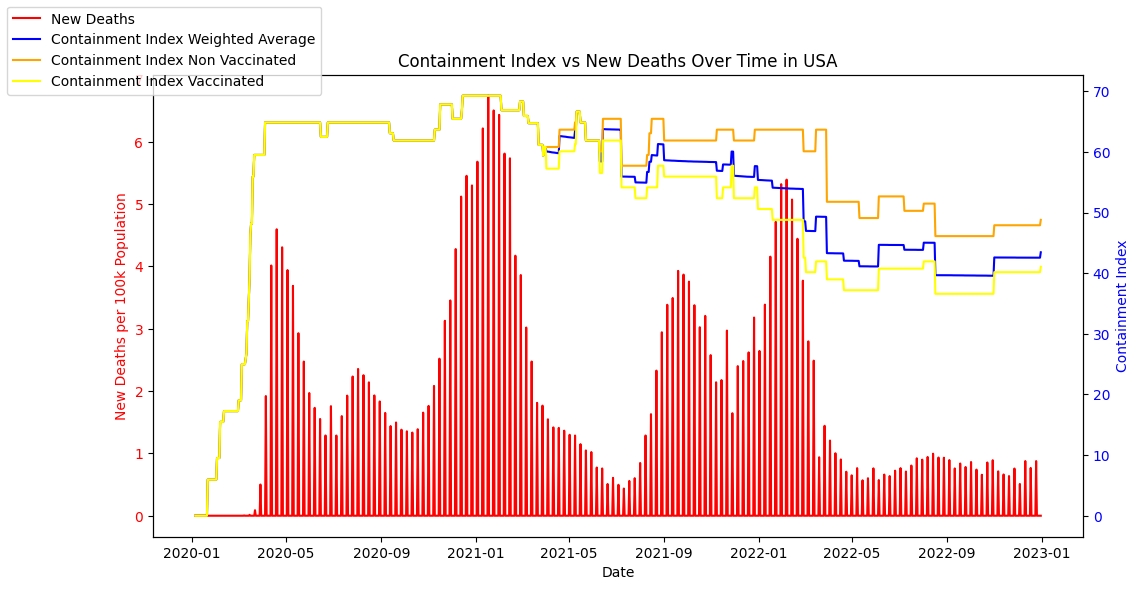

In [77]:
# Merge DataFrames on 'date'
us_merged_df = pd.merge(us_data_df, us_policy_df, on="date")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new deaths
ax1.plot(us_merged_df["date"], us_merged_df["new_deaths_per_100k"], color="red", label="New Deaths")
ax1.set_xlabel("Date")
ax1.set_ylabel("New Deaths per 100k Population", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create a secondary y-axis for Stringency Index
ax2 = ax1.twinx()
ax2.plot(
    us_merged_df["date"],
    us_merged_df["ContainmentHealthIndex_WeightedAverage"],
    color="blue",
    label="Containment Index Weighted Average",
)
ax2.plot(
    us_merged_df["date"],
    us_merged_df["ContainmentHealthIndex_NonVaccinated"],
    color="orange",
    label="Containment Index Non Vaccinated",
)
ax2.plot(
    us_merged_df["date"],
    us_merged_df["ContainmentHealthIndex_Vaccinated"],
    color="yellow",
    label="Containment Index Vaccinated",
)
ax2.set_ylabel("Containment Index", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Add title and legend
plt.title("Containment Index vs New Deaths Over Time in USA")
fig.legend(loc="upper left")

plt.show()

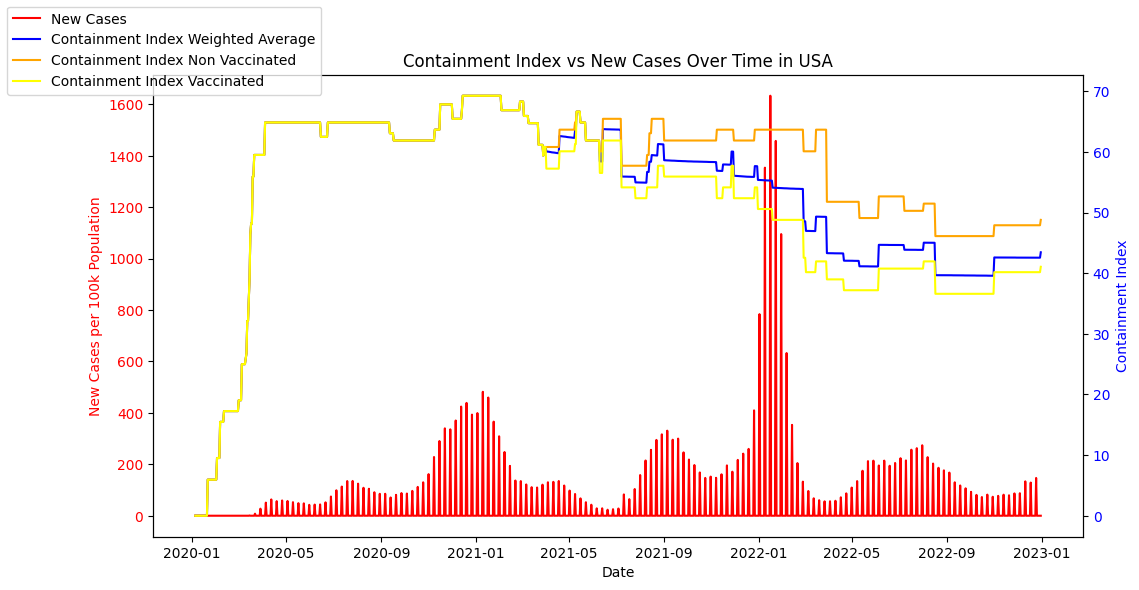

In [78]:
# Merge DataFrames on 'date'
us_merged_df = pd.merge(us_data_df, us_policy_df, on="date")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot new deaths
ax1.plot(us_merged_df["date"], us_merged_df["new_cases_per_100k"], color="red", label="New Cases")
ax1.set_xlabel("Date")
ax1.set_ylabel("New Cases per 100k Population", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create a secondary y-axis for Stringency Index
ax2 = ax1.twinx()
ax2.plot(
    us_merged_df["date"],
    us_merged_df["ContainmentHealthIndex_WeightedAverage"],
    color="blue",
    label="Containment Index Weighted Average",
)
ax2.plot(
    us_merged_df["date"],
    us_merged_df["ContainmentHealthIndex_NonVaccinated"],
    color="orange",
    label="Containment Index Non Vaccinated",
)
ax2.plot(
    us_merged_df["date"],
    us_merged_df["ContainmentHealthIndex_Vaccinated"],
    color="yellow",
    label="Containment Index Vaccinated",
)
ax2.set_ylabel("Containment Index", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Add title and legend
plt.title("Containment Index vs New Cases Over Time in USA")
fig.legend(loc="upper left")

plt.show()

In [79]:
# Calculate correlations
correlations = {}
indices = [
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
    "StringencyIndex_WeightedAverage",
]

# Standard correlation
for index in indices:
    correlation = canada_merged_df[index].corr(canada_merged_df["new_cases_per_100k"])
    correlations[f"Standard_{index}"] = correlation

# Time-lagged correlation (14 days lag since policies take time to show effect)
for index in indices:
    lagged_correlation = canada_merged_df[index].shift(14).corr(canada_merged_df["new_cases_per_100k"])
    correlations[f"Lagged_{index}"] = lagged_correlation

# Display results as DataFrame
correlation_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation"])
print("\nCorrelation Analysis:")
print(correlation_df)

# Multiple regression
X = canada_merged_df[indices].fillna(0)
y = canada_merged_df["new_cases_per_100k"].fillna(0)

model = LinearRegression()
model.fit(X, y)

# R-squared value
r_squared = model.score(X, y)
print("\nMultiple Regression R-squared:", r_squared)

# Feature importance (standardized coefficients)
importance = pd.DataFrame({"Index": indices, "Coefficient": model.coef_})
print("\nFeature Importance:")
print(importance)


Correlation Analysis:
                                                 Correlation
Standard_ContainmentHealthIndex_WeightedAverage     0.070319
Standard_EconomicSupportIndex                       0.005023
Standard_StringencyIndex_WeightedAverage            0.055975
Lagged_ContainmentHealthIndex_WeightedAverage       0.066203
Lagged_EconomicSupportIndex                         0.003795
Lagged_StringencyIndex_WeightedAverage              0.051060

Multiple Regression R-squared: 0.016713541146510136

Feature Importance:
                                    Index  Coefficient
0  ContainmentHealthIndex_WeightedAverage     0.616017
1                    EconomicSupportIndex    -0.422277
2         StringencyIndex_WeightedAverage    -0.060905


In [80]:
# Calculate correlations
correlations = {}
indices = [
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
    "StringencyIndex_WeightedAverage",
]

# Standard correlation
for index in indices:
    correlation = canada_merged_df[index].corr(canada_merged_df["new_deaths_per_100k"])
    correlations[f"Standard_{index}"] = correlation

# Time-lagged correlation (14 days lag since policies take time to show effect)
for index in indices:
    lagged_correlation = canada_merged_df[index].shift(14).corr(canada_merged_df["new_deaths_per_100k"])
    correlations[f"Lagged_{index}"] = lagged_correlation

# Display results as DataFrame
correlation_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation"])
print("\nCorrelation Analysis:")
print(correlation_df)

# Multiple regression
X = canada_merged_df[indices].fillna(0)
y = canada_merged_df["new_deaths_per_100k"].fillna(0)

model = LinearRegression()
model.fit(X, y)

# R-squared value
r_squared = model.score(X, y)
print("\nMultiple Regression R-squared:", r_squared)

# Feature importance (standardized coefficients)
importance = pd.DataFrame({"Index": indices, "Coefficient": model.coef_})
print("\nFeature Importance:")
print(importance)


Correlation Analysis:
                                                 Correlation
Standard_ContainmentHealthIndex_WeightedAverage     0.072201
Standard_EconomicSupportIndex                       0.068780
Standard_StringencyIndex_WeightedAverage            0.075811
Lagged_ContainmentHealthIndex_WeightedAverage       0.072797
Lagged_EconomicSupportIndex                         0.072191
Lagged_StringencyIndex_WeightedAverage              0.080466

Multiple Regression R-squared: 0.00585365727768572

Feature Importance:
                                    Index  Coefficient
0  ContainmentHealthIndex_WeightedAverage    -0.000638
1                    EconomicSupportIndex     0.000078
2         StringencyIndex_WeightedAverage     0.001455


In [81]:
# Calculate correlations
correlations = {}
indices = [
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
    "StringencyIndex_WeightedAverage",
]

# Standard correlation
for index in indices:
    correlation = us_merged_df[index].corr(us_merged_df["new_cases_per_100k"])
    correlations[f"Standard_{index}"] = correlation

# Time-lagged correlation (14 days lag since policies take time to show effect)
for index in indices:
    lagged_correlation = us_merged_df[index].shift(14).corr(us_merged_df["new_cases_per_100k"])
    correlations[f"Lagged_{index}"] = lagged_correlation

# Display results as DataFrame
correlation_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation"])
print("\nCorrelation Analysis:")
print(correlation_df)

# Multiple regression
X = us_merged_df[indices].fillna(0)
y = us_merged_df["new_cases_per_100k"].fillna(0)

model = LinearRegression()
model.fit(X, y)

# R-squared value
r_squared = model.score(X, y)
print("\nMultiple Regression R-squared:", r_squared)

# Feature importance (standardized coefficients)
importance = pd.DataFrame({"Index": indices, "Coefficient": model.coef_})
print("\nFeature Importance:")
print(importance)


Correlation Analysis:
                                                 Correlation
Standard_ContainmentHealthIndex_WeightedAverage     0.054378
Standard_EconomicSupportIndex                      -0.039911
Standard_StringencyIndex_WeightedAverage            0.031789
Lagged_ContainmentHealthIndex_WeightedAverage       0.054169
Lagged_EconomicSupportIndex                        -0.039343
Lagged_StringencyIndex_WeightedAverage              0.033840

Multiple Regression R-squared: 0.016695385658225814

Feature Importance:
                                    Index  Coefficient
0  ContainmentHealthIndex_WeightedAverage     0.819403
1                    EconomicSupportIndex    -0.729229
2         StringencyIndex_WeightedAverage     0.516365


In [82]:
# Calculate correlations
correlations = {}
indices = [
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
    "StringencyIndex_WeightedAverage",
]

# Standard correlation
for index in indices:
    correlation = us_merged_df[index].corr(us_merged_df["new_deaths_per_100k"])
    correlations[f"Standard_{index}"] = correlation

# Time-lagged correlation (14 days lag since policies take time to show effect)
for index in indices:
    lagged_correlation = us_merged_df[index].shift(14).corr(us_merged_df["new_deaths_per_100k"])
    correlations[f"Lagged_{index}"] = lagged_correlation

# Display results as DataFrame
correlation_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation"])
print("\nCorrelation Analysis:")
print(correlation_df)

# Multiple regression
X = us_merged_df[indices].fillna(0)
y = us_merged_df["new_deaths_per_100k"].fillna(0)

model = LinearRegression()
model.fit(X, y)

# R-squared value
r_squared = model.score(X, y)
print("\nMultiple Regression R-squared:", r_squared)

# Feature importance (standardized coefficients)
importance = pd.DataFrame({"Index": indices, "Coefficient": model.coef_})
print("\nFeature Importance:")
print(importance)


Correlation Analysis:
                                                 Correlation
Standard_ContainmentHealthIndex_WeightedAverage     0.144730
Standard_EconomicSupportIndex                       0.087610
Standard_StringencyIndex_WeightedAverage            0.144222
Lagged_ContainmentHealthIndex_WeightedAverage       0.144440
Lagged_EconomicSupportIndex                         0.088325
Lagged_StringencyIndex_WeightedAverage              0.150129

Multiple Regression R-squared: 0.0243861259410737

Feature Importance:
                                    Index  Coefficient
0  ContainmentHealthIndex_WeightedAverage     0.000926
1                    EconomicSupportIndex    -0.003347
2         StringencyIndex_WeightedAverage     0.010296


In [83]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import signal


def analyze_policy_impact(df, policy_col, cases_col, max_lag=30):
    # 1. Cross-correlation analysis
    xcorr = signal.correlate(
        df[policy_col] - df[policy_col].mean(), df[cases_col] - df[cases_col].mean(), mode="full"
    ) / (len(df) * df[policy_col].std() * df[cases_col].std())

    lags = np.arange(-(len(df) - 1), len(df))
    max_corr_lag = lags[np.argmax(np.abs(xcorr))]

    # 2. Granger causality test
    data = pd.concat([df[cases_col], df[policy_col]], axis=1)
    gc_test = grangercausalitytests(data, maxlag=max_lag, verbose=False)

    # Get minimum p-value and corresponding lag
    p_values = [gc_test[i + 1][0]["ssr_chi2test"][1] for i in range(max_lag)]
    best_lag = np.argmin(p_values) + 1

    return {
        "max_correlation_lag": max_corr_lag,
        "cross_correlation": xcorr,
        "granger_best_lag": best_lag,
        "granger_p_value": min(p_values),
    }

for index in [
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
    "StringencyIndex_WeightedAverage",
]:
    results = analyze_policy_impact(canada_merged_df, index, "new_cases_per_100k")
    print(f"\nResults for {index}:")
    print(f"Best lag from cross-correlation: {results['max_correlation_lag']} days")
    print(f"Granger causality best lag: {results['granger_best_lag']} days")
    print(f"Granger causality p-value: {results['granger_p_value']:.4f}")

for index in [
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
    "StringencyIndex_WeightedAverage",
]:
    results = analyze_policy_impact(us_merged_df, index, "new_cases_per_100k")
    print(f"\nResults for {index}:")
    print(f"Best lag from cross-correlation: {results['max_correlation_lag']} days")
    print(f"Granger causality best lag: {results['granger_best_lag']} days")
    print(f"Granger causality p-value: {results['granger_p_value']:.4f}")

/Users/nicholasalden/.pyenv/versions/3.8.16/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Results for ContainmentHealthIndex_WeightedAverage:
Best lag from cross-correlation: -721 days
Granger causality best lag: 12 days
Granger causality p-value: 0.0002

Results for EconomicSupportIndex:
Best lag from cross-correlation: 312 days
Granger causality best lag: 1 days
Granger causality p-value: 0.8364

Results for StringencyIndex_WeightedAverage:
Best lag from cross-correlation: 195 days
Granger causality best lag: 10 days
Granger causality p-value: 0.0000

Results for ContainmentHealthIndex_WeightedAverage:
Best lag from cross-correlation: -728 days
Granger causality best lag: 5 days
Granger causality p-value: 0.0381

Results for EconomicSupportIndex:
Best lag from cross-correlation: 309 days
Granger causality best lag: 1 days
Granger causality p-value: 0.1866

Results for StringencyIndex_WeightedAverage:
Best lag from cross-correlation: -721 days
Granger causality best lag: 5 days
Granger causality p-value: 0.1545


In [84]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dtaidistance import dtw
from scipy import stats


def comprehensive_policy_analysis(df, policy_col, cases_col):
    # Prepare data
    data = pd.DataFrame({"cases": df[cases_col], "policy": df[policy_col]})

    # 1. ARIMAX Analysis
    model_arimax = SARIMAX(data["cases"], exog=data["policy"], order=(1, 1, 1))
    results_arimax = model_arimax.fit()

    # 2. VAR Analysis
    model_var = VAR(data)
    results_var = model_var.fit(maxlags=15, ic="aic")

    # 3. Interrupted Time Series
    # Assume policy change point at median date
    breakpoint = len(df) // 2
    its_model = sm.OLS(
        data["cases"],
        sm.add_constant(
            np.column_stack(
                (
                    np.arange(len(df)),
                    (np.arange(len(df)) >= breakpoint),
                    (np.arange(len(df)) - breakpoint) * (np.arange(len(df)) >= breakpoint),
                )
            )
        ),
    )
    its_results = its_model.fit()

    # 4. DTW Distance
    dtw_distance = dtw.distance(data["cases"].values, data["policy"].values)

    return {
        "arimax_aic": results_arimax.aic,
        "arimax_params": results_arimax.params,
        "var_causality": results_var.test_causality("cases", "policy", kind="f"),
        "its_params": its_results.params,
        "dtw_distance": dtw_distance,
    }


# Run analysis
results = comprehensive_policy_analysis(
    canada_merged_df, "ContainmentHealthIndex_WeightedAverage", "new_cases_per_100k"
)

# Print results
print("ARIMAX Parameters:", results["arimax_aic"])
print("ARIMAX Parameters:", results["arimax_params"])
print("\nVAR Causality Test:", results["var_causality"])
print("\nInterrupted Time Series Parameters:", results["its_params"])
print("\nDTW Distance:", results["dtw_distance"])

print("--------------------------------------------------------------------------------")

# Run analysis
results = comprehensive_policy_analysis(canada_merged_df, "EconomicSupportIndex", "new_cases_per_100k")

# Print results
print("ARIMAX Parameters:", results["arimax_aic"])
print("ARIMAX Parameters:", results["arimax_params"])
print("\nVAR Causality Test:", results["var_causality"])
print("\nInterrupted Time Series Parameters:", results["its_params"])
print("\nDTW Distance:", results["dtw_distance"])

print("--------------------------------------------------------------------------------")

# Run analysis
results = comprehensive_policy_analysis(canada_merged_df, "StringencyIndex_WeightedAverage", "new_cases_per_100k")

# Print results
print("ARIMAX Parameters:", results["arimax_aic"])
print("ARIMAX Parameters:", results["arimax_params"])
print("\nVAR Causality Test:", results["var_causality"])
print("\nInterrupted Time Series Parameters:", results["its_params"])
print("\nDTW Distance:", results["dtw_distance"])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27978D+00    |proj g|=  1.41180D-01

At iterate    5    f=  5.22934D+00    |proj g|=  1.75999D-02

At iterate   10    f=  5.19397D+00    |proj g|=  3.26180D-02


 This problem is unconstrained.



At iterate   15    f=  5.17882D+00    |proj g|=  4.34356D-03

At iterate   20    f=  5.17815D+00    |proj g|=  8.52840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   1.698D-06   5.178D+00
  F =   5.1781510194884568     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMAX Parameters: 11317.08182656279
ARIMAX Parameters: policy       0.256595
ar.L1       -0.115551
ma.L1       -0.963801
sigma2    1854.363365
dtype: float64

VAR Causality Test: <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: policy does not Granger-cause case

 This problem is unconstrained.



At iterate   10    f=  5.18373D+00    |proj g|=  2.89688D-03

At iterate   15    f=  5.17925D+00    |proj g|=  4.45936D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     26      1     0     0   2.856D-06   5.179D+00
  F =   5.1790653650668812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMAX Parameters: 11319.078757306068
ARIMAX Parameters: policy       0.050732
ar.L1       -0.116372
ma.L1       -0.961460
sigma2    1857.867218
dtype: float64

VAR Causality Test: <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: policy does not Granger-cause cas

 This problem is unconstrained.



At iterate   10    f=  5.18362D+00    |proj g|=  4.59714D-02

At iterate   15    f=  5.17866D+00    |proj g|=  5.56883D-03

At iterate   20    f=  5.17748D+00    |proj g|=  4.40373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   4.040D-06   5.177D+00
  F =   5.1774772243202971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMAX Parameters: 11315.610257915529
ARIMAX Parameters: policy       0.249192
ar.L1       -0.115590
ma.L1       -0.964980
sigma2    1851.832001
dtype: float64

VAR Causality Test: <statsmodels.tsa.vector_ar.hypothesis_test_results.Causa

In [85]:
# Run analysis
results = comprehensive_policy_analysis(
    us_merged_df, "ContainmentHealthIndex_WeightedAverage", "new_cases_per_100k"
)

# Print results
print("ARIMAX Parameters:", results["arimax_params"])
print("\nVAR Causality Test:", results["var_causality"])
print("\nInterrupted Time Series Parameters:", results["its_params"])
print("\nDTW Distance:", results["dtw_distance"])

print("--------------------------------------------------------------------------------")

# Run analysis
results = comprehensive_policy_analysis(us_merged_df, "EconomicSupportIndex", "new_cases_per_100k")

# Print results
print("ARIMAX Parameters:", results["arimax_params"])
print("\nVAR Causality Test:", results["var_causality"])
print("\nInterrupted Time Series Parameters:", results["its_params"])
print("\nDTW Distance:", results["dtw_distance"])

print("--------------------------------------------------------------------------------")

# Run analysis
results = comprehensive_policy_analysis(us_merged_df, "StringencyIndex_WeightedAverage", "new_cases_per_100k")

# Print results
print("ARIMAX Parameters:", results["arimax_params"])
print("\nVAR Causality Test:", results["var_causality"])
print("\nInterrupted Time Series Parameters:", results["its_params"])
print("\nDTW Distance:", results["dtw_distance"])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18180D+00    |proj g|=  1.57645D-01

At iterate    5    f=  6.11987D+00    |proj g|=  3.28345D-03

At iterate   10    f=  6.10887D+00    |proj g|=  1.95628D-02


 This problem is unconstrained.



At iterate   15    f=  6.09413D+00    |proj g|=  4.41907D-03

At iterate   20    f=  6.09146D+00    |proj g|=  9.44424D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   4.023D-06   6.091D+00
  F =   6.0914601753709343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMAX Parameters: policy        0.349560
ar.L1        -0.120424
ma.L1        -0.958086
sigma2    11541.763807
dtype: float64

VAR Causality Test: <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: policy does not Granger-cause cases: fail to reject at 5% significa

 This problem is unconstrained.



At iterate   15    f=  6.09784D+00    |proj g|=  2.43549D-03

At iterate   20    f=  6.09235D+00    |proj g|=  2.46671D-03

At iterate   25    f=  6.09162D+00    |proj g|=  5.27569D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     38      1     0     0   5.276D-06   6.092D+00
  F =   6.0916218431066227     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMAX Parameters: policy        0.056977
ar.L1        -0.120774
ma.L1        -0.957326
sigma2    11545.498835
dtype: float64

VAR Causality Test: <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: polic

 This problem is unconstrained.



At iterate   10    f=  6.09791D+00    |proj g|=  1.26453D-02

At iterate   15    f=  6.09224D+00    |proj g|=  2.03889D-03

At iterate   20    f=  6.09141D+00    |proj g|=  6.61752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   2.088D-06   6.091D+00
  F =   6.0914095393721670     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMAX Parameters: policy        0.295852
ar.L1        -0.120299
ma.L1        -0.958322
sigma2    11540.527779
dtype: float64

VAR Causality Test: <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: polic

                            OLS Regression Results                            
Dep. Variable:     new_cases_per_100k   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.887
Date:                Mon, 04 Nov 2024   Prob (F-statistic):             0.0346
Time:                        22:54:03   Log-Likelihood:                -5673.8
No. Observations:                1092   AIC:                         1.136e+04
Df Residuals:                    1088   BIC:                         1.138e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

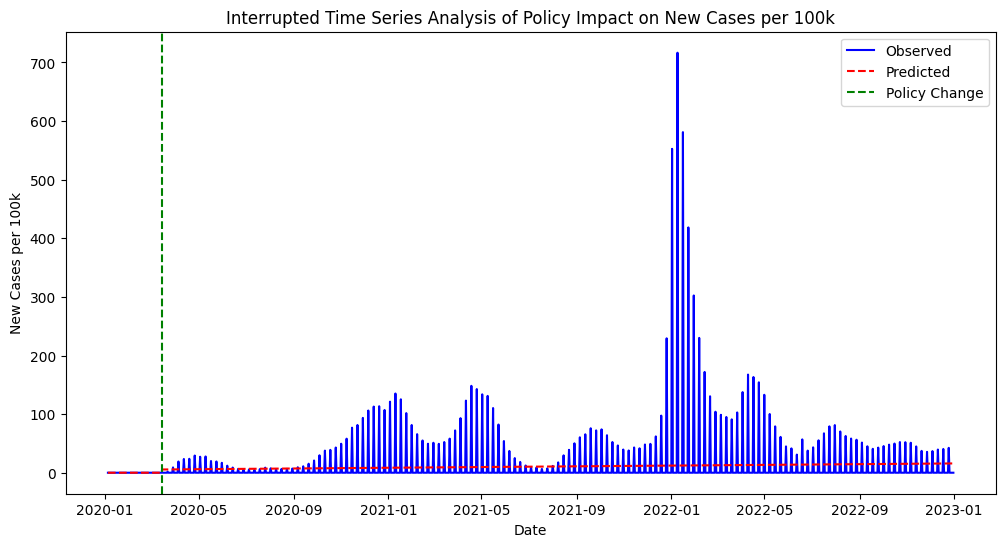

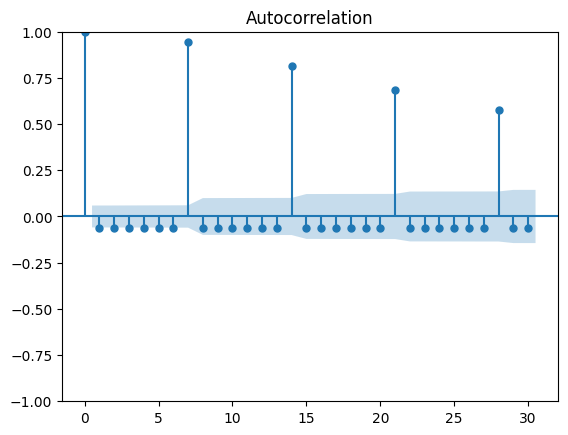

                           GLSAR Regression Results                           
Dep. Variable:     new_cases_per_100k   R-squared:                       0.009
Model:                          GLSAR   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.239
Date:                Mon, 04 Nov 2024   Prob (F-statistic):             0.0215
Time:                        22:54:03   Log-Likelihood:                -5667.1
No. Observations:                1091   AIC:                         1.134e+04
Df Residuals:                    1087   BIC:                         1.136e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

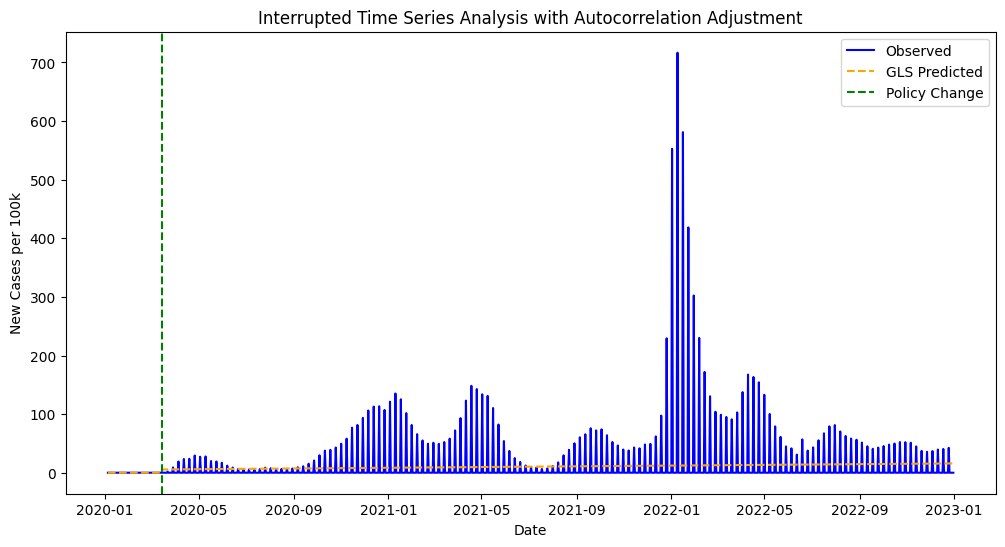

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.regression.linear_model import GLSAR

# Copy the DataFrame (assuming 'canada_merged_df' is your DataFrame)
df = canada_merged_df.copy()

# Prepare the data
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Ensure numeric data types
df["new_cases_per_100k"] = pd.to_numeric(df["new_cases_per_100k"], errors="coerce")
df["StringencyIndex_WeightedAverage"] = pd.to_numeric(df["StringencyIndex_WeightedAverage"], errors="coerce")
df.fillna(method="ffill", inplace=True)

# Create time variables
df["time"] = np.arange(len(df))

# Define the date of the policy change
policy_date = "2020-03-15"  # Replace with your actual policy change date

# Create intervention variables
df["intervention"] = np.where(df.index >= policy_date, 1, 0)
df["time_after_intervention"] = df["time"] - df["time"][df.index == policy_date][0]
df["time_after_intervention"] = df["time_after_intervention"].clip(lower=0)

# Define independent and dependent variables
df["intercept"] = 1  # Add an intercept term
X = df[["intercept", "time", "intervention", "time_after_intervention"]]
y = df["new_cases_per_100k"]

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Predicted values
df["predicted"] = model.predict(X)

# Plot the observed and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["new_cases_per_100k"], label="Observed", color="blue")
plt.plot(df.index, df["predicted"], label="Predicted", color="red", linestyle="--")
plt.axvline(pd.to_datetime(policy_date), color="green", linestyle="--", label="Policy Change")
plt.title("Interrupted Time Series Analysis of Policy Impact on New Cases per 100k")
plt.xlabel("Date")
plt.ylabel("New Cases per 100k")
plt.legend()
plt.show()

# Check residuals for autocorrelation
residuals = model.resid
plot_acf(residuals, lags=30)
plt.show()

# Adjust the model if autocorrelation is present
# Fit GLSAR model (Generalized Least Squares with AR(1) errors)
gls_model = GLSAR(y, X, rho=1)
gls_results = gls_model.iterative_fit()
print(gls_results.summary())

# Predicted values from GLSAR model
df["gls_predicted"] = gls_results.predict(X)

# Plot the observed and GLS-adjusted predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["new_cases_per_100k"], label="Observed", color="blue")
plt.plot(df.index, df["gls_predicted"], label="GLS Predicted", color="orange", linestyle="--")
plt.axvline(pd.to_datetime(policy_date), color="green", linestyle="--", label="Policy Change")
plt.title("Interrupted Time Series Analysis with Autocorrelation Adjustment")
plt.xlabel("Date")
plt.ylabel("New Cases per 100k")
plt.legend()
plt.show()